In [1]:
import pandas as pd
df = pd.read_csv("c:/data/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

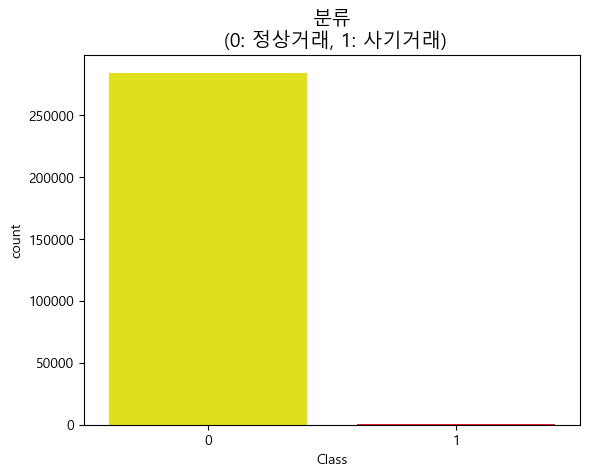

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0: 정상거래, 1: 사기거래)', fontsize=14)

In [3]:
print("사기거래")
print(df.Amount[df.Class == 1].describe())
print()
print("정상거래")
print(df.Amount[df.Class == 0].describe())
# 사기거래 492건, 정상거래 284315건

사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [5]:
train_cols = df.columns[1:30]
print(train_cols)
X = df[train_cols] # 독립변수
y = df["Class"]
print(df[train_cols].head())
print(y.head())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [7]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    #모델 초기화
    model = Sequential(name='model1')
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number,)))
    model.add(Dense(hidden_layers[1], activation="relu"))
    model.add(Dense(hidden_layers[2], activation="relu"))
    # 드롭아웃 계층 Dropout(p) p라는 확률로
    # 출력 노드의 신호를 보내다 말다 함, 과적합 방지
    # 지정한 비율만큼 랜덤으로 출력을 off 시켜서 과적합을 방지하기 위한 기법
    # 앙상블 학습의 효과도 얻을 수 있음(모델이 계속 변함)
    model.add(Dropout(0.2, name='Dropout'))
    #출력층(시그모이드: 이진분류)
    model.add(Dense(output_number, activation="sigmoid", name='Output'))
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model

In [17]:
model = make_model(len(X_train.columns), [128,64,32], 1)
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3840      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 Dropout (Dropout)           (None, 32)                0         
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


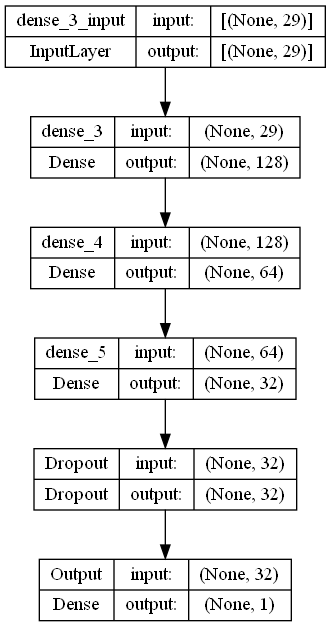

In [18]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

In [11]:
X_train_scaled=X_train
X_test_scaled=X_test

In [19]:
from datetime import datetime  
import tensorflow as tf  
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230417-112021'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  
hist = model.fit(X_train_scaled, y_train, epochs=50,callbacks=[tensorboard_callback])

Epoch 1/50
25/25 [==============================] - 1s 7ms/step - loss: 0.2466 - accuracy: 0.7014
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.8615
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1136 - accuracy: 0.8767
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.8755
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9199
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9301
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0860 - accuracy: 0.9098
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9187
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1001 - accuracy: 0.8895
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.8856
Epoch 11/50
25/25 [

In [12]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 0.2438 - accuracy: 0.6557
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.8399
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.8844
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.8424
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.8793
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.9276
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9225
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0965 - accuracy: 0.8983
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1212 - accuracy: 0.8666
Epoch 10/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.8907


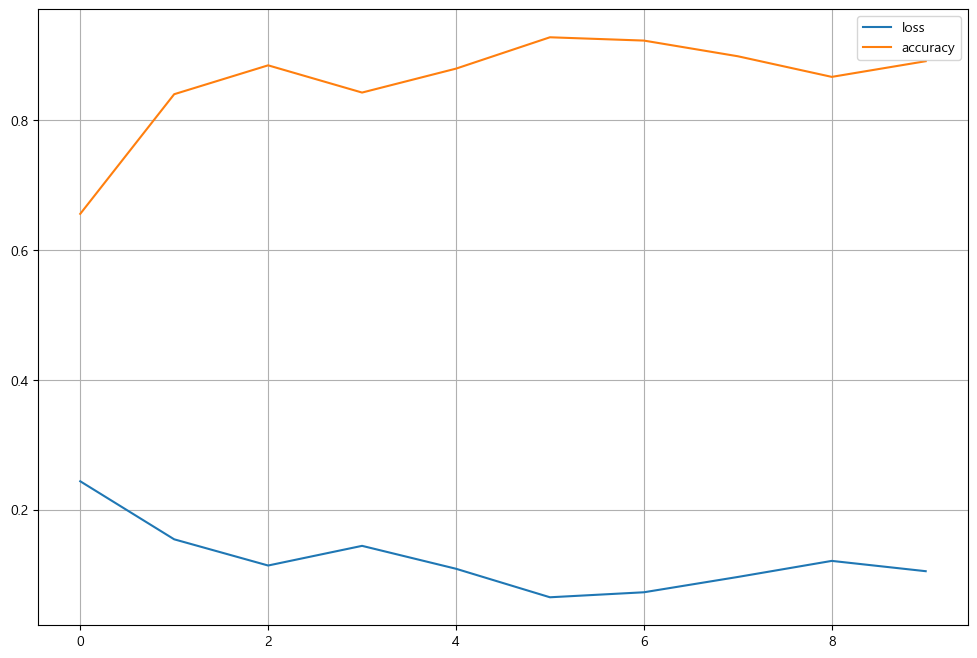

In [13]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [14]:
# 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용

25/25 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9022
[0.09604357182979584, 0.902160108089447]
accuracy: 90.22%


In [15]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

7/7 [==============================] - 0s 5ms/step - loss: 0.1266 - accuracy: 0.8579
[0.12658457458019257, 0.8578680157661438]
accuracy: 85.79%


In [21]:
import numpy as np
pred=model.predict(X_test)
print(pred[:5])
print(np.round(pred[:5]))

7/7 [==============================] - 0s 3ms/step
[[1.0000000e+00]
 [2.6809587e-07]
 [9.9029750e-01]
 [1.2551885e-03]
 [1.0000000e+00]]
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [22]:
model.save('c:/data/creditcard/creditcard.h5')

In [23]:
model.save('c:/data/creditcard/model')

INFO:tensorflow:Assets written to: c:/data/creditcard/model\assets
